In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import (r2_score,mean_squared_error)
from sklearn.pipeline import make_pipeline

In [12]:
x,y = make_regression(n_samples=300, n_features=1, noise=10, random_state=42)
y = y + 2*x.flatten()**2 - 3*x.flatten()**3 + np.random.normal(0,10,len(y))

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

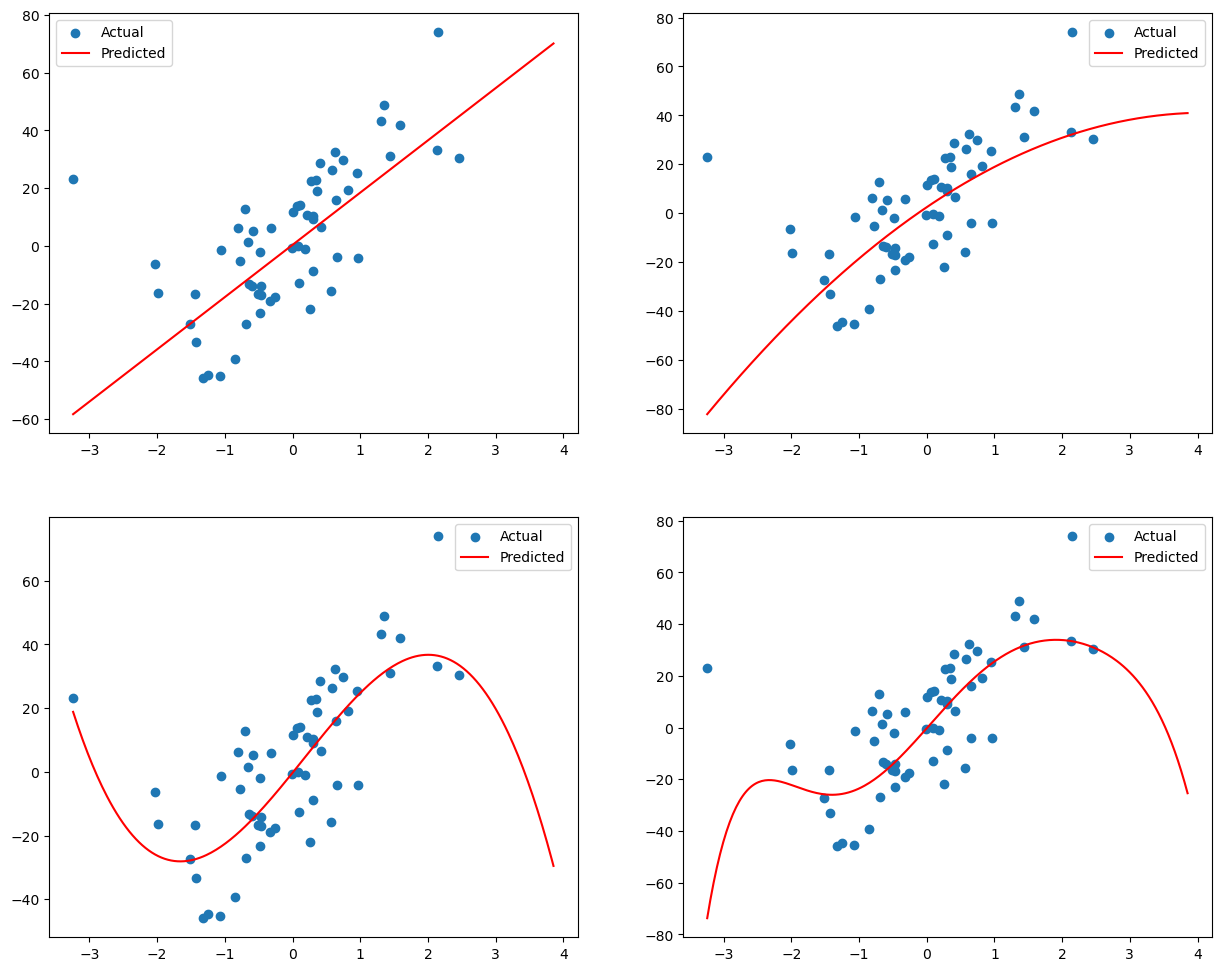

In [13]:
fig, axes = plt.subplots(2,2,figsize=(15,12))
degrees = [1,2,3,6]
for degree,ax in zip(degrees, axes.flatten()):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2,rmse = r2_score(y_test,y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

    x_curve = np.linspace(x.min(), x.max(), 300).reshape(-1,1)
    ax.scatter(x_test, y_test, label='Actual')
    ax.plot(x_curve, model.predict(x_curve), label = 'Predicted', color='red')
    ax.legend()
    
